In [2]:
import pandas as pd
import numpy as np

np.set_printoptions(legacy="1.25")

In [3]:
df = pd.read_csv("./winequality-red.csv")

In [4]:
target_variable = "quality"
numerical_vars = list(set(df.columns) - set([target_variable]))

# EDA

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
### fix column names
for col in df.columns:
    new_name = col.replace(" ", "_")
    if new_name != col:
        df = df.rename(columns={col: new_name})

## missing values

In [7]:
display(df.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## ranges and distributions

In [9]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


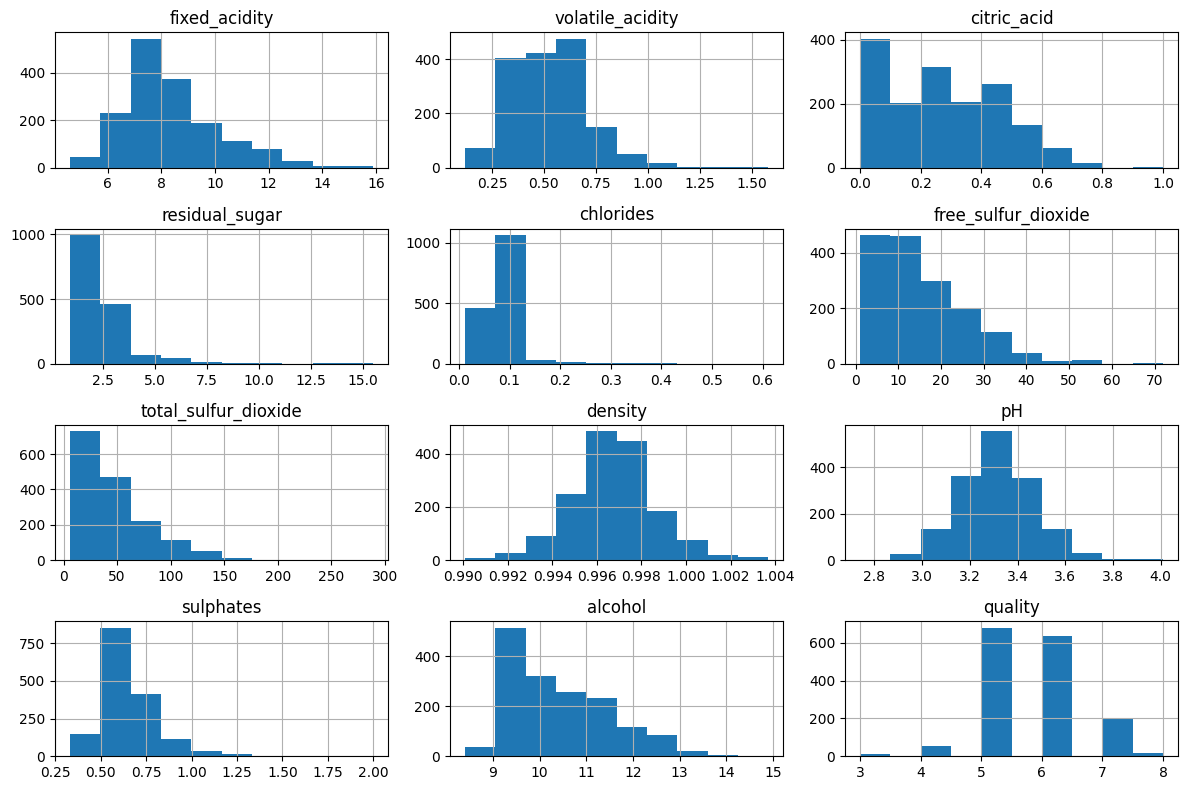

In [10]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## correlation

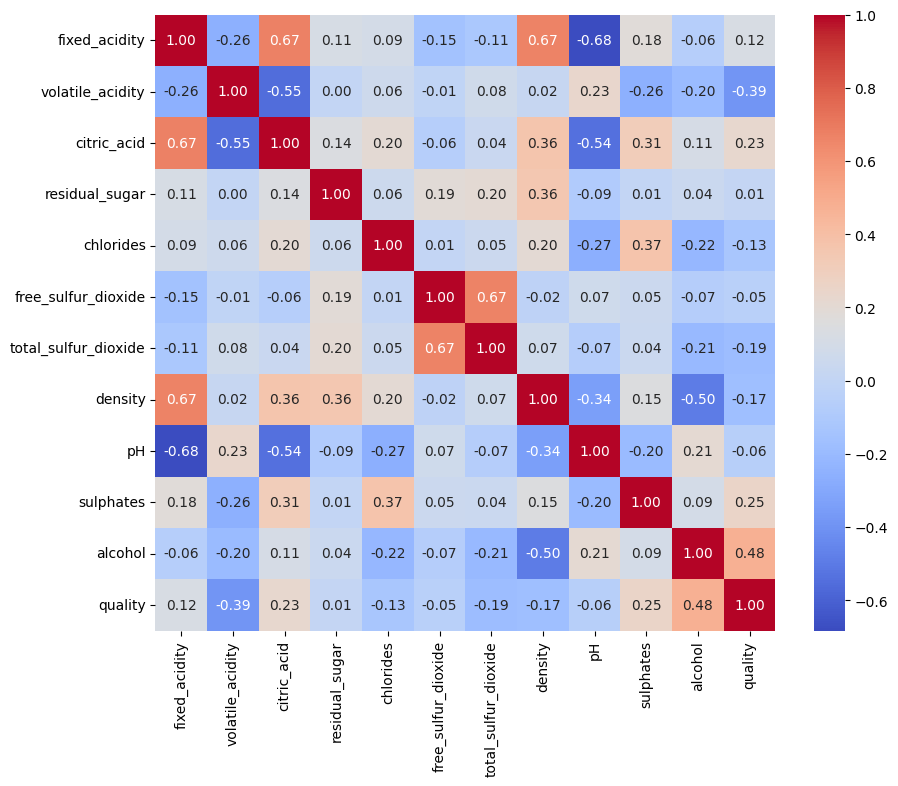

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The acidity variables `volatile acidity`, `citric acid`, `fixed acidity` are somewhat correlated with `pH` which makes sense.

In [12]:
from sklearn.model_selection import train_test_split

train_ratio = 0.60
test_ratio = 0.20
validation_ratio = 0.20

# train is now 60% of the entire data set
# test is 40% but we will split it again
df_train, df_test = train_test_split(
    df,
    test_size=1 - train_ratio,
    random_state=1,
)

# test is now 20% of the initial data set
# validation is now 20% of the initial data set
df_test, df_val = train_test_split(
    df_test,
    test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=1,
)

y_train = df_train[target_variable].values
y_test = df_test[target_variable].values
y_val = df_val[target_variable].values

df_train = df_train.drop(columns=target_variable)
df_test = df_test.drop(columns=target_variable)
df_val = df_val.drop(columns=target_variable)

np.array([df_train.shape[0], df_val.shape[0], df_test.shape[0]]) / df.shape[0]

array([0.59974984, 0.20012508, 0.20012508])

In [13]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient="records")

dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

In [14]:
X_train.shape

(959, 11)

# Models

## DecisionTreeRegressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import root_mean_squared_error

dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [16]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)
y_pred = dt.predict(X_val)

In [17]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- alcohol <= 11.45
|   |--- sulphates <= 0.57
|   |   |--- volatile_acidity <= 0.87
|   |   |   |--- density <= 1.00
|   |   |   |   |--- alcohol <= 9.95
|   |   |   |   |   |--- value: [5.12]
|   |   |   |   |--- alcohol >  9.95
|   |   |   |   |   |--- value: [5.38]
|   |   |   |--- density >  1.00
|   |   |   |   |--- value: [3.00]
|   |   |--- volatile_acidity >  0.87
|   |   |   |--- free_sulfur_dioxide <= 5.50
|   |   |   |   |--- residual_sugar <= 1.95
|   |   |   |   |   |--- value: [4.50]
|   |   |   |   |--- residual_sugar >  1.95
|   |   |   |   |   |--- value: [3.00]
|   |   |   |--- free_sulfur_dioxide >  5.50
|   |   |   |   |--- chlorides <= 0.06
|   |   |   |   |   |--- value: [6.00]
|   |   |   |   |--- chlorides >  0.06
|   |   |   |   |   |--- value: [4.68]
|   |--- sulphates >  0.57
|   |   |--- alcohol <= 9.85
|   |   |   |--- fixed_acidity <= 12.45
|   |   |   |   |--- alcohol <= 8.45
|   |   |   |   |   |--- value: [3.00]
|   |   |   |   |--- alcohol >  8.45
|

haha that's a little funny that alcohol content is the first feature to split the data

In [18]:
root_mean_squared_error(y_val, y_pred)

0.6918250152527118

## RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, n_jobs=-1, random_state=1)

In [20]:
y_pred = rf.predict(X_val)

In [21]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_true=y_val, y_pred=y_pred)

0.6303540645177191

### n_estimators effect on RMSE

In [22]:
from tqdm import tqdm

rmses = []
nestimators = np.arange(10, 61, 2)

for ne in tqdm(nestimators):
    rf = RandomForestRegressor(n_estimators=ne, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    rmses.append(rmse)

100%|██████████| 26/26 [00:01<00:00, 17.62it/s]


Text(0.5, 1.0, 'N estimators vs RMSE')

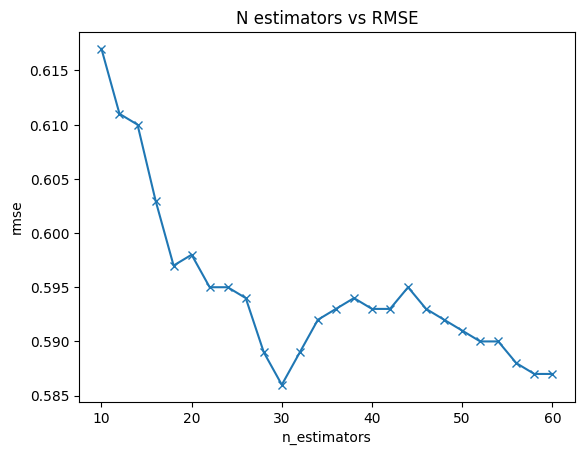

In [23]:
import matplotlib.pyplot as plt

rmses = pd.DataFrame([nestimators, rmses], index=["nestimator", "rmse"]).T
plt.plot(rmses.nestimator, round(rmses.rmse, 3), "x-")
plt.xlabel("n_estimators")
plt.ylabel("rmse")
plt.title("N estimators vs RMSE")

In [24]:
rmses.loc[np.argmin(rmses.rmse)]

nestimator    30.000000
rmse           0.586355
Name: 10, dtype: float64

### max_depth effect on RMSE

In [25]:
max_depths = np.arange(1, 31, 2)
mean_rmses = []
# nestimators np.arange(10,201,10)
for md in tqdm(max_depths):
    rmses = []
    for ne in nestimators:
        rf = RandomForestRegressor(
            n_estimators=ne, random_state=1, n_jobs=-1, max_depth=md
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        rmses.append(rmse)

    mean_rmse = np.mean(rmses)
    mean_rmses.append(mean_rmse)

100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


In [26]:
max_depths[np.argmin([round(x, 3) for x in mean_rmses])]

25

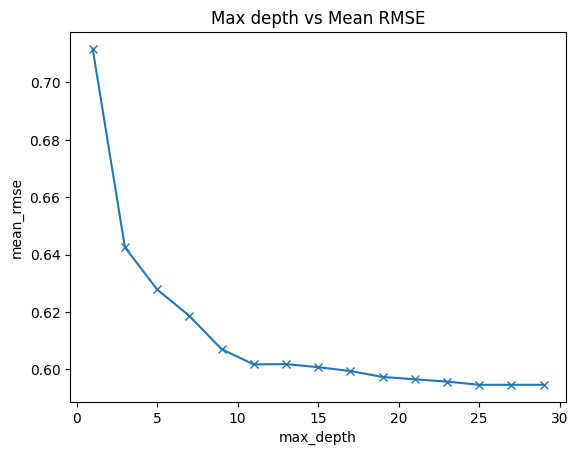

In [27]:
plt.plot(max_depths, mean_rmses, "x-")
plt.xlabel("max_depth")
plt.ylabel("mean_rmse")
plt.title("Max depth vs Mean RMSE")
plt.show()

### Feature Importance

In [28]:
rf = RandomForestRegressor(n_estimators=30, max_depth=25, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [29]:
importance_df = pd.DataFrame(
    {
        "feature": dv.get_feature_names_out(),
        "importance": rf.feature_importances_,
    }
).sort_values("importance", ascending=False)
importance_df

,feature,importance
0,alcohol,0.271172
10,volatile_acidity,0.147692
8,sulphates,0.147581
9,total_sulfur_dioxide,0.083614
1,chlorides,0.058218
6,pH,0.056107
7,residual_sugar,0.052957
3,density,0.052797
4,fixed_acidity,0.050610
2,citric_acid,0.039776


## XGBoost

In [30]:
import xgboost as xgb

features = list(dv.get_feature_names_out())
# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
# dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [31]:
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    "eta": np.arange(0.01, 0.31, 0.01),
    "gamma": np.arange(0, 11, 4),
    "max_depth": np.arange(1, 11, 1),
    "min_child_weight": np.arange(1, 11, 4),
    # "max_delta_step": np.arange(0, 11, 1),
    # "subsample": np.arange(0.1, 1.1, 0.2),
    # "colsample_bytree": np.arange(0.1, 1.1, 0.2),
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        verbosity=0,  # 0 = silent, 1 = warning, 2 = info
        n_jobs=-1,  # Use all cores
    ),
    param_grid=xgb_param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,  # Parallel CV folds
    verbose=1,  # Show progress
)

grid_search.fit(X_train, y_train)
# model = xgb.train(xgb_params, dtrain, num_boost_round=100)
# y_pred = model.predict(dval)
# root_mean_squared_error(y_val, y_pred)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'eta': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
                         'gamma': array([0, 4, 8]),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_child_weight': array([1, 5, 9])},
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
grid_search.best_params_

{'eta': 0.09, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 9}

In [33]:
model = xgb.XGBRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
root_mean_squared_error(y_val, y_pred)

0.6195803880691528

In [34]:
X_test = dv.transform(df_test.to_dict(orient="records"))
y_test = model.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.8397223353385925

Ok this seems like the best we have. Let's deploy it!

In [35]:
df_test.sample(1).to_dict(orient="records")

[{'fixed_acidity': 8.2,
  'volatile_acidity': 0.26,
  'citric_acid': 0.34,
  'residual_sugar': 2.5,
  'chlorides': 0.073,
  'free_sulfur_dioxide': 16.0,
  'total_sulfur_dioxide': 47.0,
  'density': 0.99594,
  'pH': 3.4,
  'sulphates': 0.78,
  'alcohol': 11.3}]

In [36]:
## save model weights
import pickle

# use best params to make final model
final_model = xgb.XGBRegressor(**grid_search.best_params_)
final_model.fit(X_train, y_train)

# Save both the DictVectorizer and the model
with open("model.bin", "wb") as f_out:
    pickle.dump((dv, final_model), f_out)

In [37]:
with open("model.bin", "rb") as f_in:
    dv, loaded_model = pickle.load(f_in)

In [38]:
import json

json.dumps(df_test.sample(2).to_dict(orient="records"))

'[{"fixed_acidity": 7.3, "volatile_acidity": 0.52, "citric_acid": 0.32, "residual_sugar": 2.1, "chlorides": 0.07, "free_sulfur_dioxide": 51.0, "total_sulfur_dioxide": 70.0, "density": 0.99418, "pH": 3.34, "sulphates": 0.82, "alcohol": 12.9}, {"fixed_acidity": 7.3, "volatile_acidity": 0.55, "citric_acid": 0.03, "residual_sugar": 1.6, "chlorides": 0.072, "free_sulfur_dioxide": 17.0, "total_sulfur_dioxide": 42.0, "density": 0.9956, "pH": 3.37, "sulphates": 0.48, "alcohol": 9.0}]'

In [39]:
x_test_sample = dv.transform(df_test.sample(1).to_dict(orient="records"))
loaded_model.predict(x_test_sample)

array([4.9465065], dtype=float32)